In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [381]:
def plot_image_with_scatter(valence: np.ndarray, arousal: np.ndarray, img: str | np.ndarray, sigma: float = 0.25) -> plt.Figure:
    """
    Plot an image with scatter points.

    Args:
        valence (np.ndarray): Array of valence values.
        arousal (np.ndarray): Array of arousal values.
        img (Union[str, np.ndarray]): Path to an image file or image as a numpy array.
        sigma (float, optional): A value for transparency calculation. 1 - no transperency, 0 - completely transparent. Defaults to 0.25.

    Returns:
        plt.Figure: The matplotlib Figure object.

    Raises:
        IsADirectoryError: If img is a directory.
        FileNotFoundError: If img file is not found.
        ValueError: If img is not a string or a numpy array.
    """

    if isinstance(img, str):
        if os.path.exists(img):
            if os.path.isfile(img):
                name = os.path.basename(img)
                img = plt.imread(img)
            else:
                raise IsADirectoryError(f'{img} is a directory')
        else:
            raise FileNotFoundError(f'File {img} not found')
    elif isinstance(img, np.ndarray):
        name = 'image'
    else:
        raise ValueError(f'path must be a string or a numpy array, got {type(img)}')

    mean_valence = valence.mean()
    mean_arousal = arousal.mean()
    alpha_linear = 1 - np.abs(np.sqrt((valence - mean_valence) ** 2 + (arousal - mean_arousal) ** 2)) / 8

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(img)
    ax1.set_title(name)
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)

    ax2.grid()
    ax2.scatter(mean_valence, mean_arousal, color='tab:red', zorder=2)
    ax2.scatter(
        valence,
        arousal,
        color='tab:blue',
        alpha=np.exp(-(1 - alpha_linear) ** 2 / sigma ** 2),
        zorder=2
    )
    ax2.axhline(4, color='black', zorder=1, alpha=0.5)
    ax2.axvline(4, color='black', zorder=1, alpha=0.5)
    ax2.set_xlim(1, 7)
    ax2.set_ylim(1, 7)
    ax2.set_ylabel('Arousal')
    ax2.set_xlabel('Valence')
    ax2.legend(['mean', 'individual'], loc='upper right')

    return fig

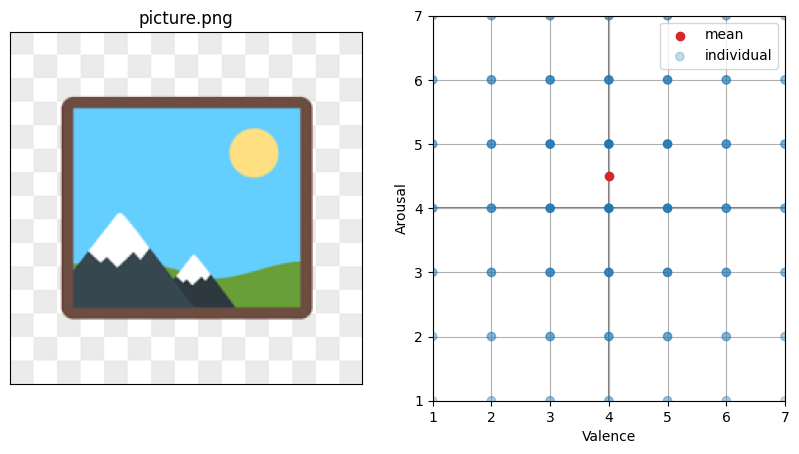

In [383]:
img = '/home/user/Downloads/picture.png'

fig = plot_image_with_scatter(
    np.array([np.arange(7)+1 for i in range(8)]),
    np.array([np.ones(7)*i+1 for i in range(8)]),
    img,
    .5
)

In [384]:
def generate_coordinates(n: int, min_: int, max_: int) -> tuple[np.ndarray, np.ndarray]:
    """Generates two NumPy arrays of size `n` with random integer coordinates in the range from `min_` to `max_`.

    Args:
        n: The number of coordinates to generate.
        min_: The minimum value of the coordinates.
        max_: The maximum value of the coordinates.

    Returns:
        A tuple of two NumPy arrays, `x` and `y`, containing the generated coordinates.
    """
    x = np.random.randint(min_, max_, size=n)
    y = np.random.randint(min_, max_, size=n)
    seen = set()
    for i in range(n):
        while (x[i], y[i]) in seen:
            y[i] = np.random.randint(1, 7)
        seen.add((x[i], y[i]))
    return x, y

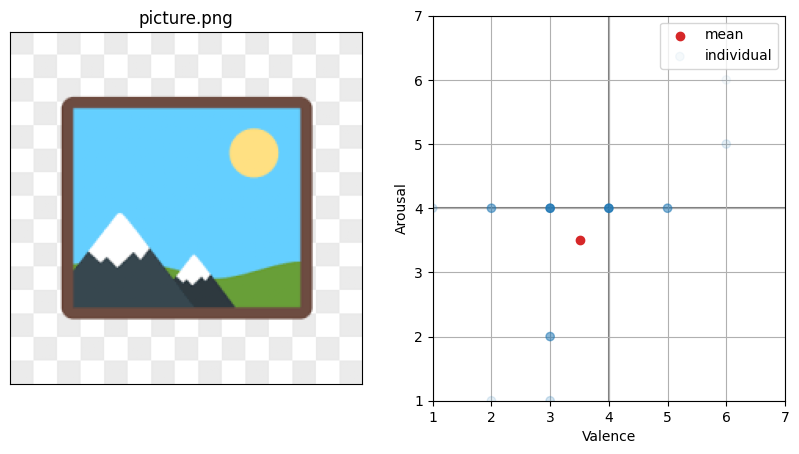

In [387]:
n_samples = 10

fig = plot_image_with_scatter(
    *generate_coordinates(n_samples, 1, 7),
    img
)